# Задачи исследования

Исследование заказал интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й, нужно отработать принцип работы с данными.

# Анализ данных

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')
#data = pd.read_csv(r'C:\Users\minakov\Downloads\games.csv')

def display_data_info(data):
    print(data.info())
    print(100*'=')
    print(data.columns)
    print(100*'=')
    print(data.head(10))
    print(100*'=')
    print(data.isna().sum())

In [2]:
display_data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
                        Name Platform  Year_of_Release      

In [3]:
def display_unique_count(data, columns):
    print(columns, "\n" ,data.sort_values(columns)[columns].unique())
    print(100*'=')

In [4]:
for column in list(data.columns):
    display_unique_count(data, column)

Name 
 [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
Platform 
 ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
Year_of_Release 
 [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
Genre 
 ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]
NA_sales 
 [0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01
 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01
 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.50

# Исправление ошибок данных

##  Переименуем колонки

In [5]:
# переименуем колонки
data = data.rename(columns={'Year_of_Release':'Year_of_release',
                     'Critic_Score':'Critic_score',
                     'User_Score':'User_score'})

## Рассмотрим ошибки в Name, Genre, Year_of_Release

In [6]:
# рассмотрим ошибки в Name, Genre, Year_of_Release
display(data[data['Name'].isna()==True])

,Name,Platform,Year_of_release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_score,User_score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
display(data[data['Genre'].isna()==True])

,Name,Platform,Year_of_release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_score,User_score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
display(data[data['Year_of_release'].isna()==True])

,Name,Platform,Year_of_release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_score,User_score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# эти данные востановить не получится и их достаточно мало (5%<), то мы их просто удалим
data.drop(index = data[data['Name'].isna()==True].index, inplace = True)
data.drop(index = data[data['Genre'].isna()==True].index, inplace = True)
data.drop(index = data[data['Year_of_release'].isna()==True].index, inplace = True)

## Выпадающие значения и пропуски в Critic_score, User_score, Rating

### Critic_score, User_score

In [10]:
# изучим выпадающие значения и пропуски в Critic_score, User_score, Rating
data[data['User_score']=='tbd']

,Name,Platform,Year_of_release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_score,User_score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
list_na_columns = ['Critic_score','User_score','Rating']
list_groupby_columns = ['Platform','Year_of_release','Genre']

for current_na in list_na_columns:
    for current_groupby in list_groupby_columns:
        display(f'{current_na} {current_groupby}',
                data[data[current_na].isna()==True]
                .groupby(current_groupby)
                .count()
                .sort_values('Name', ascending=False)['Name'])

'Critic_score Platform'

Platform
DS      1413
PS       994
PS2      852
PSP      737
Wii      718
PS3      502
GBA      381
3DS      346
X360     338
N64      316
PSV      310
PC       258
SNES     239
SAT      173
PS4      140
2600     116
GC       105
NES       98
GB        97
XB        97
XOne      78
WiiU      57
DC        38
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

'Critic_score Year_of_release'

Year_of_release
2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    190
2001.0    156
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: Name, dtype: int64

'Critic_score Genre'

Genre
Action          1456
Misc            1212
Sports          1141
Adventure        973
Role-Playing     750
Simulation       509
Racing           501
Fighting         432
Platform         388
Strategy         377
Shooter          373
Puzzle           349
Name: Name, dtype: int64

'User_score Platform'

Platform
PS      987
DS      865
PS2     671
PSP     657
PS3     358
N64     316
Wii     310
GBA     302
3DS     287
PSV     280
SNES    239
X360    204
SAT     173
PC      153
PS4     129
2600    116
NES      98
GB       97
XB       86
GC       85
XOne     54
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: Name, dtype: int64

'User_score Year_of_release'

Year_of_release
2010.0    457
2008.0    440
2011.0    418
2009.0    407
2007.0    376
1998.0    348
2006.0    330
1999.0    299
2012.0    290
2015.0    271
1997.0    270
1996.0    255
2005.0    235
2014.0    231
2013.0    225
1995.0    219
2016.0    206
2000.0    200
2002.0    173
2004.0    166
2003.0    164
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1990.0     16
1987.0     16
1984.0     14
1988.0     14
1985.0     13
1980.0      9
Name: Name, dtype: int64

'User_score Genre'

Genre
Action          1143
Misc             852
Adventure        839
Sports           819
Role-Playing     714
Fighting         405
Racing           368
Strategy         329
Platform         319
Shooter          296
Simulation       285
Puzzle           236
Name: Name, dtype: int64

'Rating Platform'

Platform
PS      986
DS      866
PS2     671
PSP     657
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
SNES    239
X360    202
PC      200
SAT     173
PS4     137
2600    116
NES      98
GB       97
XB       89
GC       85
XOne     61
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: Name, dtype: int64

'Rating Year_of_release'

Year_of_release
2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1991.0     41
1992.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: Name, dtype: int64

'Rating Genre'

Genre
Action          1161
Misc             859
Adventure        853
Sports           828
Role-Playing     711
Fighting         405
Racing           370
Strategy         341
Platform         317
Shooter          300
Simulation       298
Puzzle           233
Name: Name, dtype: int64

In [12]:
data['User_score'].replace('tbd', np.NaN, inplace=True)

In [13]:
data['Year_of_release'] = data['Year_of_release'].astype(int)
data['User_score'] = data['User_score'].astype(float)

### Rating

In [14]:
# заполним пустые значение 
data['Rating'].replace(np.NaN, 'WOR', inplace=True)

## Обработка явных дубликатов

In [15]:
# удалим явные дубликаты
data.drop_duplicates(inplace=True)

## Выводы

Были удалены 271 строка без имени, года выпуска или жанра.
Для пропущенных значений оценок были установлены медианы в разрезе года, жанра, платформы. Эти строки были помечены как содержашие ошибки, для того что бы в дальнейшем можно было оценить их влияние на анализ данных.
Для пропущенных значений были установлены значения с вероятностью объема выпущенных игра для конкретной платформы в конкретном году Эти строки так же помечены как содержащие ошибки для дальнейшего анализа их влияния на результат.

# Обогащение данных

In [16]:
data['Total_sales'] = (data['NA_sales'] + 
                       data['EU_sales'] + 
                       data['JP_sales'] + 
                       data['Other_sales'])

# Исследовательский анализ данных

## Формирование актуального периода

<AxesSubplot:>

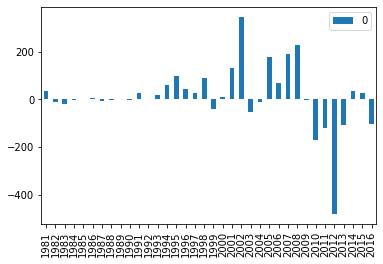

In [17]:
# посмотрим на динамику прироста игр
list_year = []
list_grow = []

data_year = data.groupby('Year_of_release').agg({'Name':'count'}).reset_index()

for i, row in enumerate(data_year.iterrows()):
    if i == 0:
        continue
    else:
        #print(data_year.loc[i,'Name'])
        list_year.append(data_year.loc[i,'Year_of_release'])
        list_grow.append(data_year.loc[i,'Name'] - data_year.loc[i-1,'Name'])
    
    
pd.DataFrame(data=list_grow, index=list_year).plot(kind='bar')

In [18]:
#Не все платформы могут быть еще актуальны, выведем список платформы и последний год релиза.
platform_list = data.groupby('Platform').agg({'Year_of_release':'max'}).sort_values('Year_of_release')
platform_list

,Year_of_release
Platform,
2600,1989
GG,1992
SCD,1994
GEN,1994
NES,1994
3DO,1995
TG16,1995
NG,1996
PCFX,1996


Для итогового набора данных возьмем только те платформы для которых в 2016 были релизы, так же анализ графиков продаж по годам, показывает, что есть явные тренды в последние 4 года. Поэтому для формирования итогового набора возьмем данные с 2012 года.

## Формирование итогового набора данных

In [19]:
# для финального анализа возьмем только данные после 2013 года
final_data = data[data['Year_of_release']>2013]

In [20]:
#т.к. мы строим прогноз на следующий месяц, то для формирования прогнозов будем брать только те платформы, 
#для которых в предыдущем периоде были релизы. Т.е. платформы у которых последний релиз был до 2016 мы отбрасываем
#как неактуальные
platform_list = list(platform_list[platform_list['Year_of_release']==2016].index)
final_data = final_data.query('Platform in @platform_list')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1676 non-null   object 
 1   Platform         1676 non-null   object 
 2   Year_of_release  1676 non-null   int64  
 3   Genre            1676 non-null   object 
 4   NA_sales         1676 non-null   float64
 5   EU_sales         1676 non-null   float64
 6   JP_sales         1676 non-null   float64
 7   Other_sales      1676 non-null   float64
 8   Critic_score     718 non-null    float64
 9   User_score       888 non-null    float64
 10  Rating           1676 non-null   object 
 11  Total_sales      1676 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 170.2+ KB


## Выпуск игр по периодам

<AxesSubplot:xlabel='Year_of_release'>

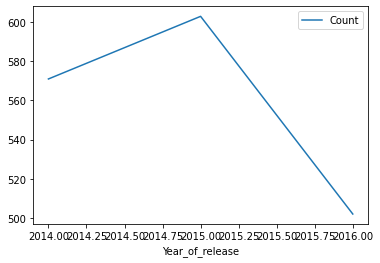

In [21]:
#display(data.groupby('Year_of_release').agg({'Name':'count'}).rename(columns={'Name':'Count'}))
final_data.groupby('Year_of_release').agg({'Name':'count'}).rename(columns={'Name':'Count'}).plot()

### Вывод

Пик выпуска игр пришелся на 2015 год, с 2013 до 2015 идет восходящий тренд, в 2016 наблюдается падение выпуска игр. 

## Продажи по платформам

### Общее количество игр по платформам 

<AxesSubplot:xlabel='Platform'>

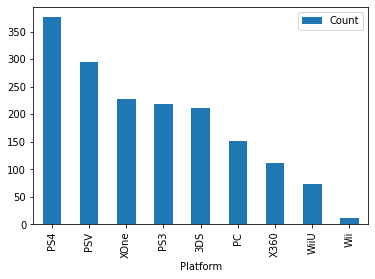

In [22]:
(final_data.groupby('Platform')
     .agg({'Name':'count'})
     .rename(columns={'Name':'Count'})
     .sort_values('Count', ascending=False)
     .plot(kind='bar'))

### Анализ статистики продаж по платформам

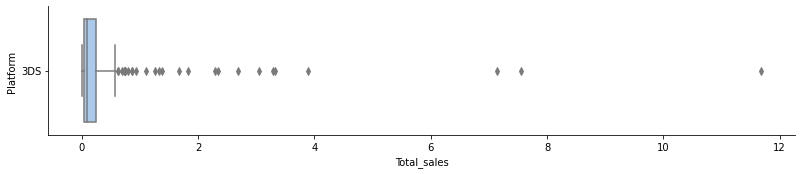

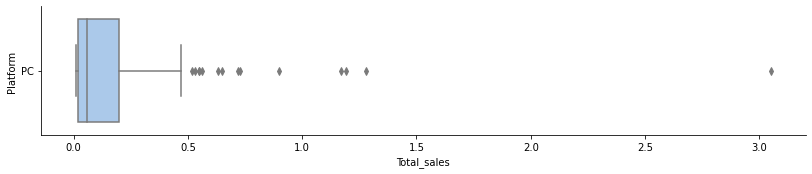

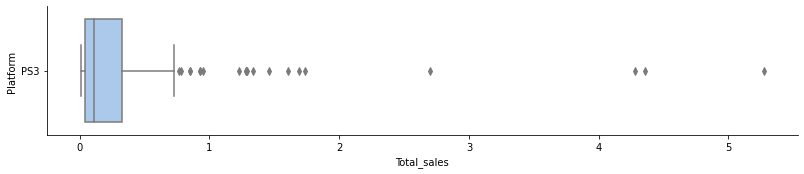

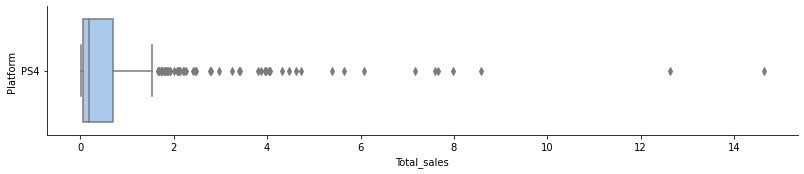

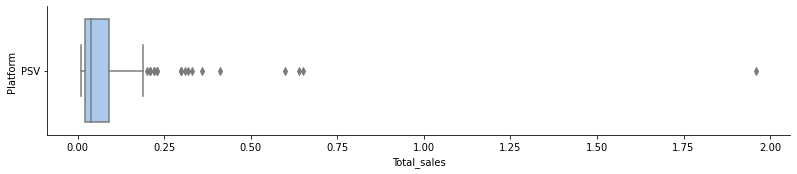

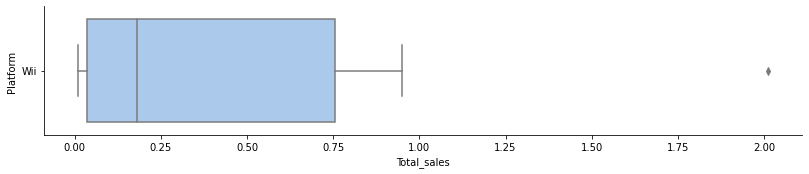

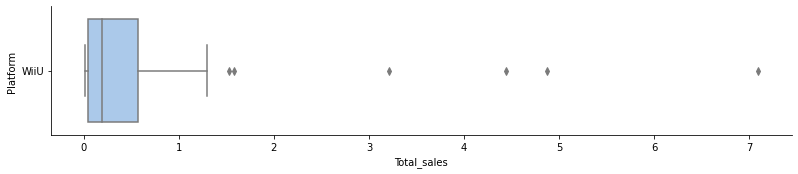

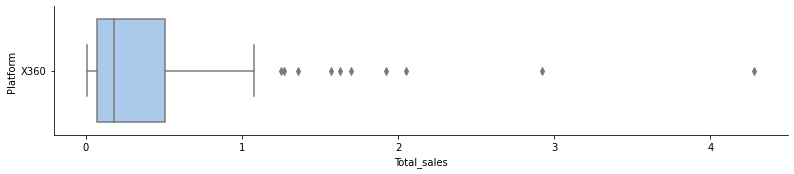

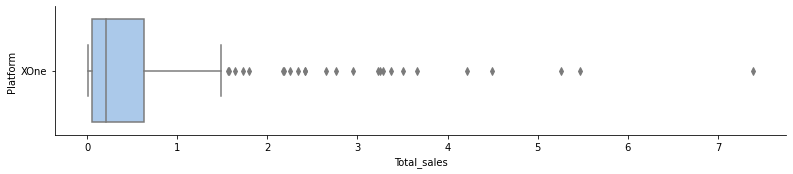

In [23]:
for platform in list(final_data.sort_values('Platform')['Platform'].unique()):
    g = sns.catplot(y='Platform', x='Total_sales', kind="box", 
                    data=final_data[final_data['Platform']==platform], 
                    orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

In [24]:
(final_data.groupby('Platform')
            .agg({'Total_sales':['mean', 'median', 'max', 'sum']})
            .sort_values(('Total_sales', 'median'),ascending=False))

Total_sales                      
                mean median    max     sum
Platform                                  
XOne        0.615614  0.205   7.39  140.36
WiiU        0.588767  0.190   7.09   42.98
PS4         0.766356  0.185  14.63  288.15
Wii         0.460909  0.180   2.01    5.07
X360        0.434414  0.180   4.28   48.22
PS3         0.311324  0.110   5.27   68.18
3DS         0.408868  0.090  11.68   86.68
PC          0.179139  0.060   3.05   27.05
PSV         0.075932  0.040   1.96   22.40

<AxesSubplot:xlabel='Platform'>

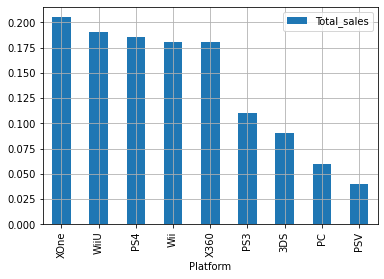

In [25]:
(final_data.groupby('Platform')
            .agg({'Total_sales':'median'})
            .sort_values('Total_sales', ascending=False).plot(kind='bar', grid=True))

<AxesSubplot:xlabel='Platform'>

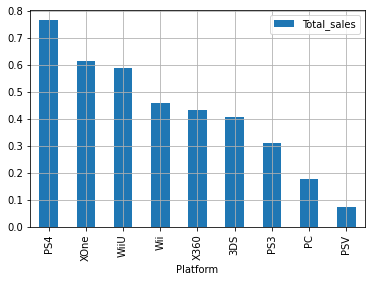

In [26]:
(final_data.groupby('Platform')
            .agg({'Total_sales':'mean'})
            .sort_values('Total_sales', ascending=False).plot(kind='bar', grid=True))

### Анализ продаж по платформам по годам

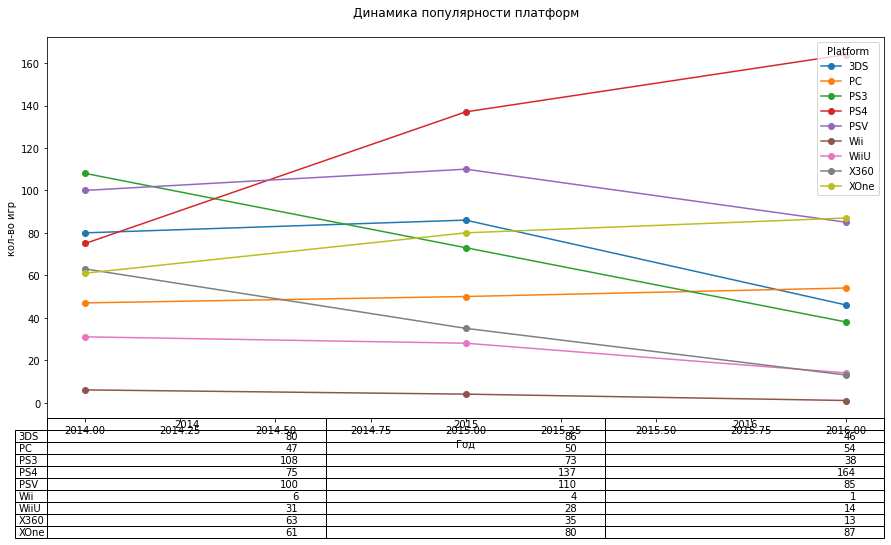

In [27]:
(final_data
         .pivot_table(index='Platform', columns='Year_of_release', values='Name', aggfunc='count')
         .T
         .plot(kind='line', figsize=(15, 7), style = 'o-', table=True))
plt.title('Динамика популярности платформ'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во игр');

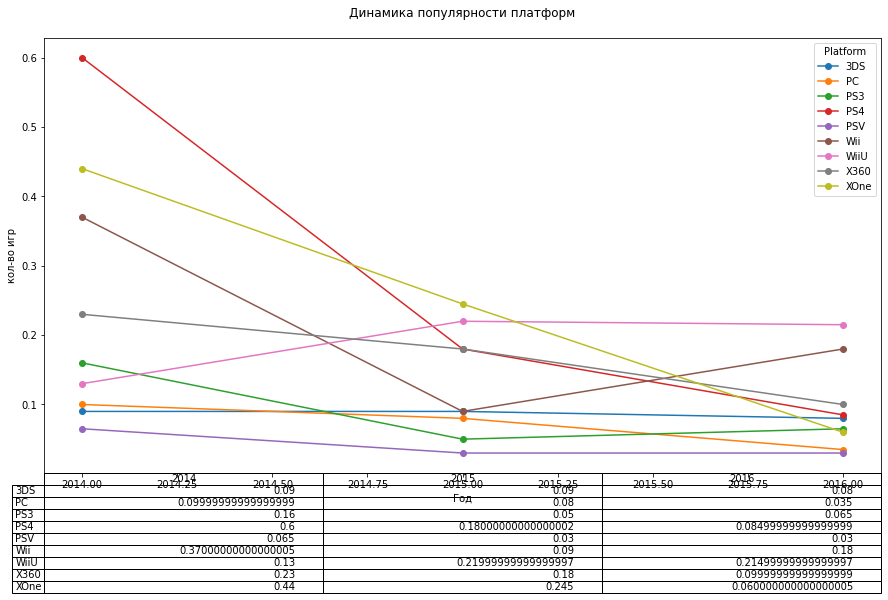

In [69]:
(final_data
         .pivot_table(index='Platform', columns='Year_of_release', values='Total_sales', aggfunc='median')
         .T
         .plot(kind='line', figsize=(15, 7), style = 'o-', table=True))
plt.title('Динамика популярности платформ'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во игр');

### Структура продаж по годам

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


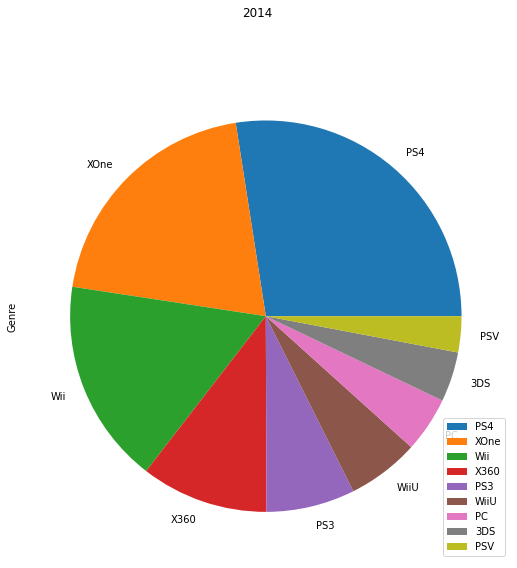

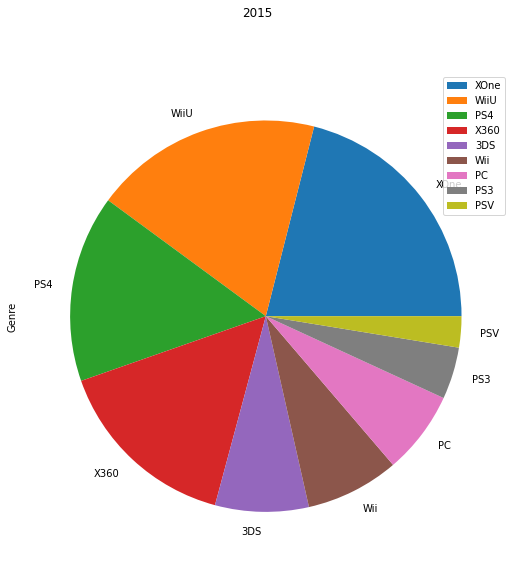

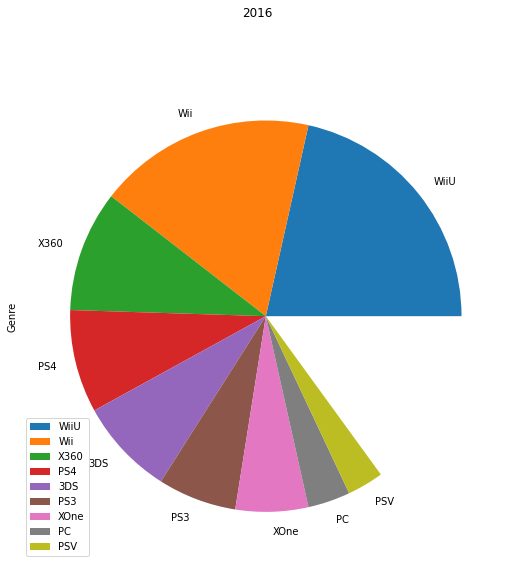

In [29]:
for year in list(final_data.sort_values('Year_of_release')['Year_of_release'].unique()):
    (final_data[(final_data['Year_of_release']==year)]
                .groupby('Platform')
                .agg({'Total_sales':'median'}).sort_values('Total_sales', ascending=False)
                .plot(y='Total_sales', ylabel='Genre', kind='pie',subplots=True, title=year,  figsize=(9, 9)))

### Влияние рейтинга на платформу 

<AxesSubplot:xlabel='Rating'>

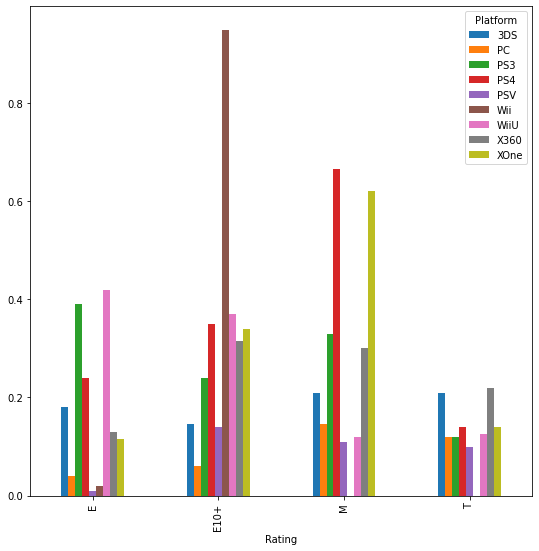

In [30]:
(final_data[final_data['Rating']!='WOR']
         .pivot_table(index='Platform', columns='Rating', 
                      values='Total_sales', aggfunc='median')
         .T.plot(kind='bar', figsize=(9,9)))

### Выводы 

В анализируемом периоде ТОП3 по абсолютным продажам платформ - PS4, PSV, PS3. Не популярные платформы по абсолютным продажам X360, WiiU, Wii. 

В анализируемом периоде ТОП3 по медианным продажам платформ - XOne, WiiU, PS4. Не популярные платформы по абсолютным продажам 3DS, PC, PSV. 

Из анализа видно, что для большей части платформ большую роль играют "звездные" игры, которые делают большие продажи, хотя в среднем продажи не высоки. 


<b>Рекомендуется делать акцент для платформ XOne, PS4, которые имеют хорошие медианные продажи и большую долю "звезд".

<b>Так же можно выбрать платформы WiiU, Wii которые обладают средним показателем медианных продаж и небольшим количеством "звезд".
    


## Продажи по жанрам

### Анализ продаж по жанрам по годам

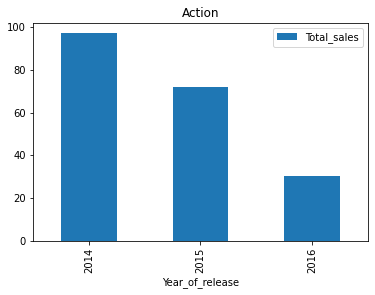

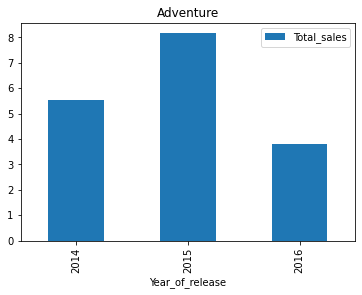

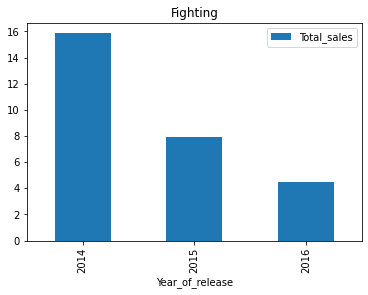

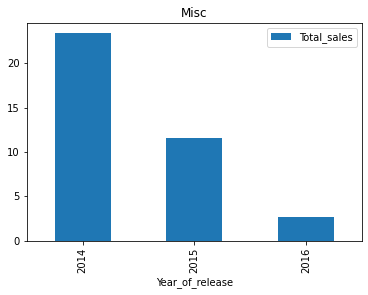

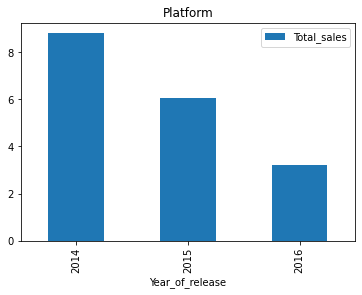

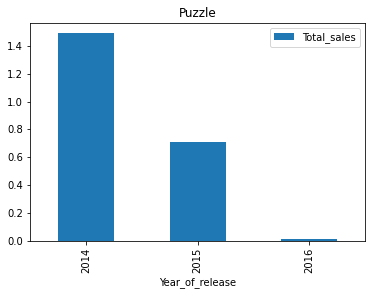

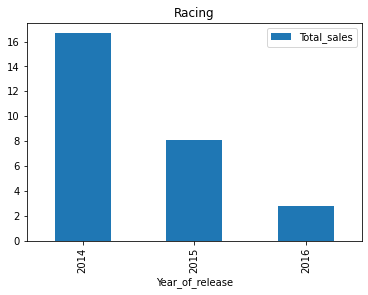

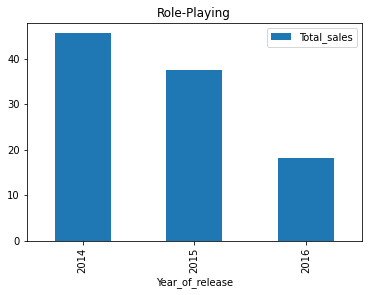

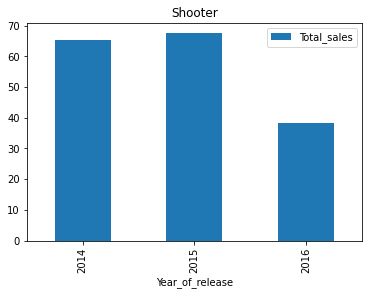

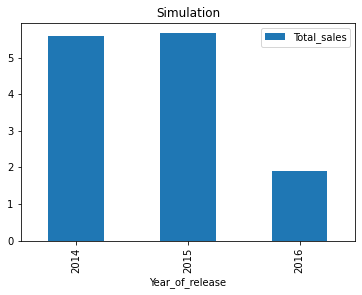

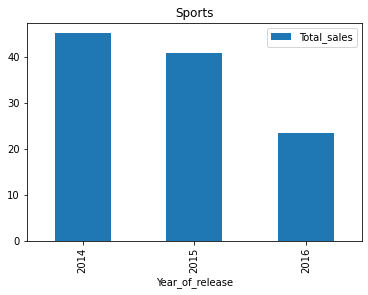

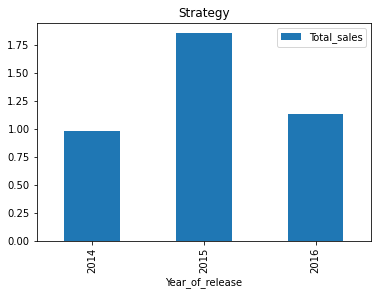

In [31]:
for genre in list(final_data.sort_values('Genre')['Genre'].unique()):
    #(final_data[((final_data['Genre']==genre)&(final_data['is_fault']==False))]
    (final_data[final_data['Genre']==genre] 
                .groupby('Year_of_release')
                .agg({'Total_sales':'sum'}).plot(kind='bar', title=genre))

### Анализ статистики продаж по жанрам

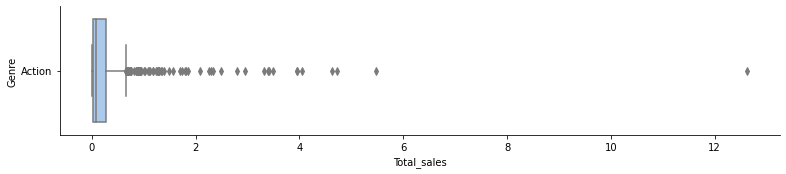

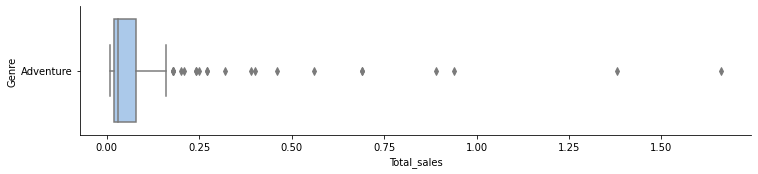

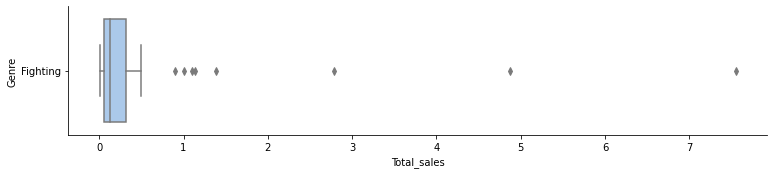

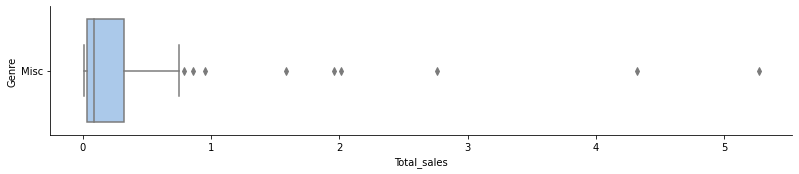

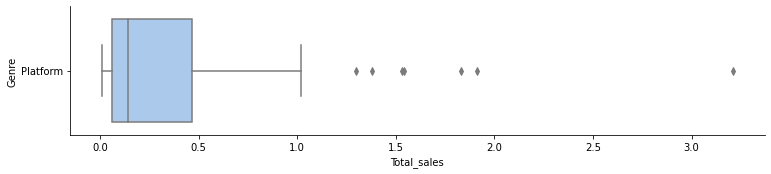

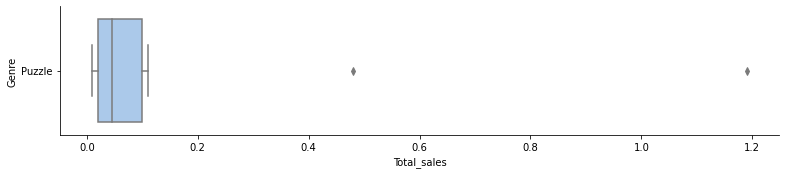

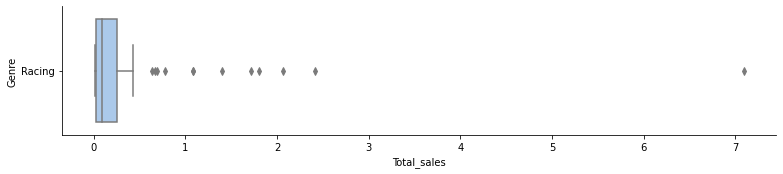

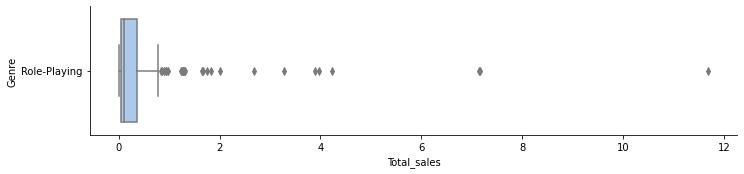

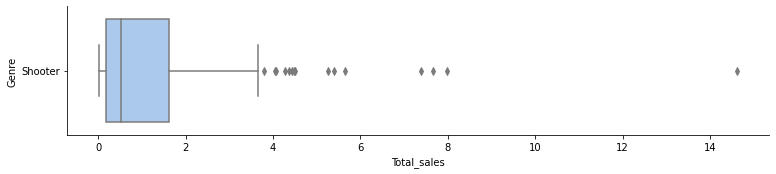

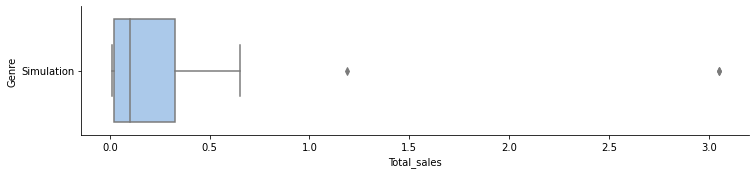

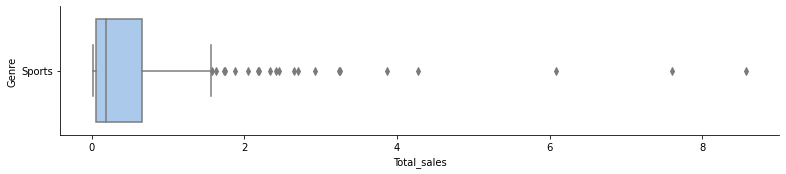

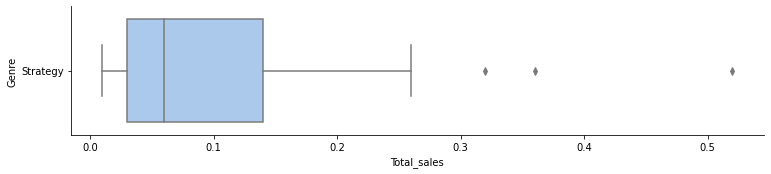

In [32]:
for genre in list(final_data.sort_values('Genre')['Genre'].unique()):
    g = sns.catplot(y='Genre', x='Total_sales', kind="box", 
                    data=final_data[final_data['Genre']==genre], 
                    orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

In [33]:
(final_data.groupby('Genre')
            .agg({'Total_sales':['mean', 'median', 'max', 'sum']})
            .sort_values(('Total_sales', 'median'),ascending=False))

Total_sales                      
                    mean median    max     sum
Genre                                         
Shooter         1.335469  0.515  14.63  170.94
Sports          0.683688  0.190   8.58  109.39
Platform        0.476053  0.140   3.21   18.09
Fighting        0.470333  0.125   7.55   28.22
Role-Playing    0.459005  0.110  11.68  101.44
Simulation      0.298409  0.100   3.05   13.13
Action          0.324894  0.090  12.62  199.16
Misc            0.338108  0.090   5.27   37.53
Racing          0.398841  0.090   7.09   27.52
Strategy        0.107027  0.060   0.52    3.96
Puzzle          0.157857  0.045   1.19    2.21
Adventure       0.096685  0.030   1.66   17.50

<AxesSubplot:xlabel='Genre'>

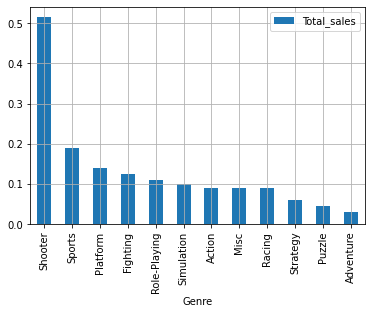

In [34]:
(final_data.groupby('Genre')
            .agg({'Total_sales':'median'})
            .sort_values('Total_sales', ascending=False).plot(kind='bar', grid=True))

<AxesSubplot:xlabel='Genre'>

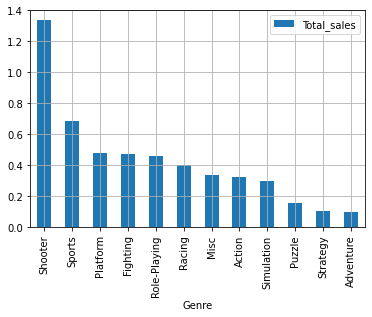

In [35]:
(final_data.groupby('Genre')
            .agg({'Total_sales':'mean'})
            .sort_values('Total_sales', ascending=False).plot(kind='bar', grid=True))

### Общая структура

array([<AxesSubplot:ylabel='Genre'>], dtype=object)

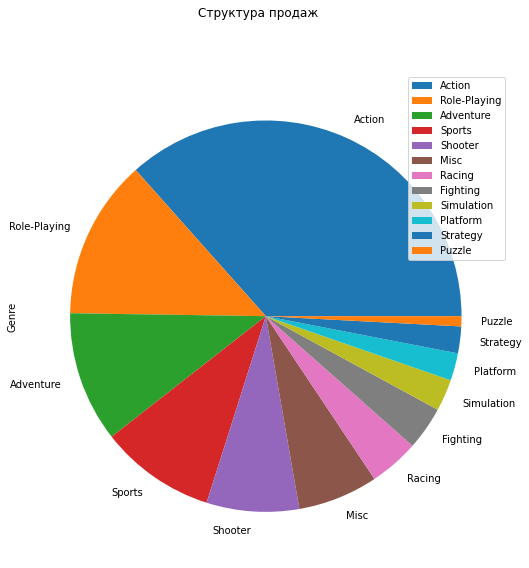

In [36]:
(final_data
                .groupby('Genre')
                .agg({'Total_sales':'count'}).sort_values('Total_sales', ascending=False)
                .plot(y='Total_sales', ylabel='Genre', kind='pie'
                      ,subplots=True, title='Структура продаж',  figsize=(9, 9)))

### Структура игр по годам

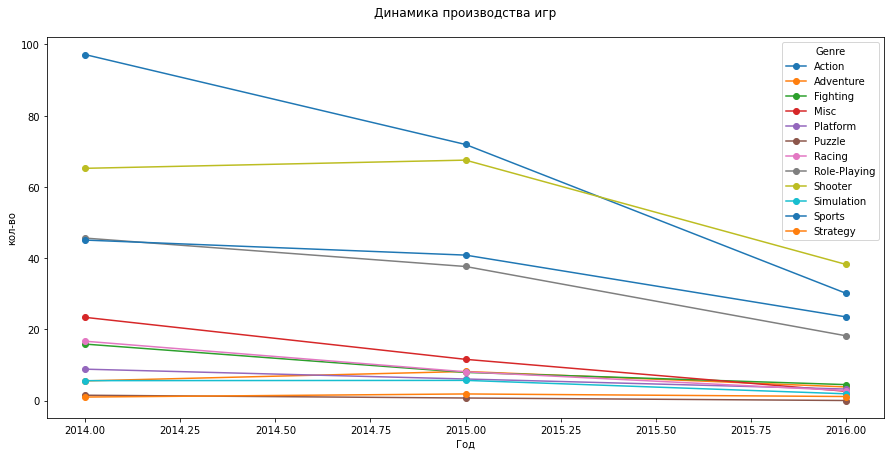

In [37]:
(final_data
         .pivot_table(index='Genre', columns='Year_of_release', values='Total_sales', aggfunc='sum')
         .T
         .plot(kind='line', figsize=(15, 7), style = 'o-'))
plt.title('Динамика производства игр'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во');

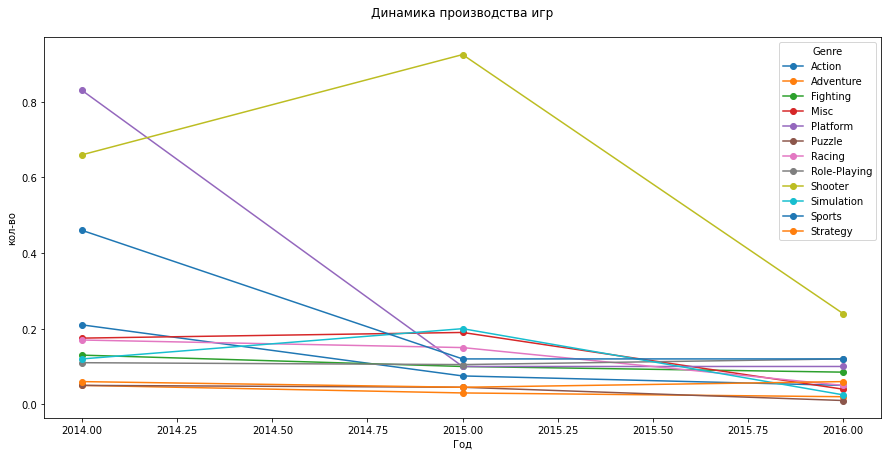

In [38]:
(final_data
         .pivot_table(index='Genre', columns='Year_of_release', values='Total_sales', aggfunc='median')
         .T
         .plot(kind='line', figsize=(15, 7), style = 'o-'))
plt.title('Динамика производства игр'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во');

### Структура жанров по популярным платформам

#### Абсолютные продажи

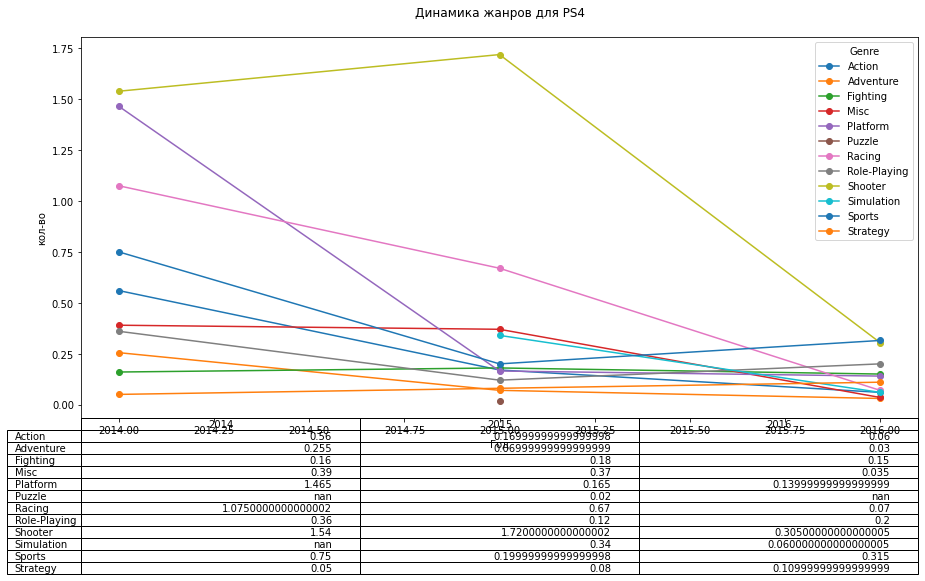

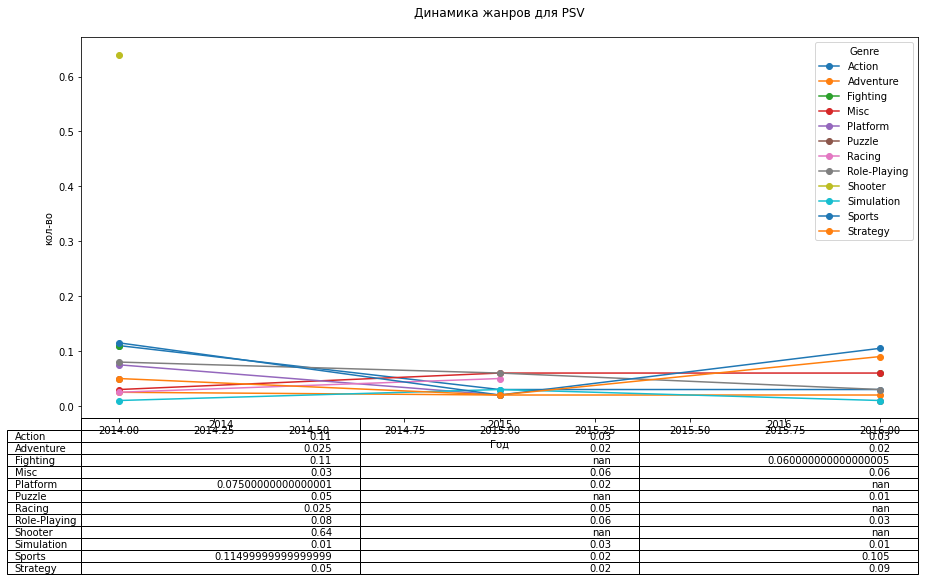

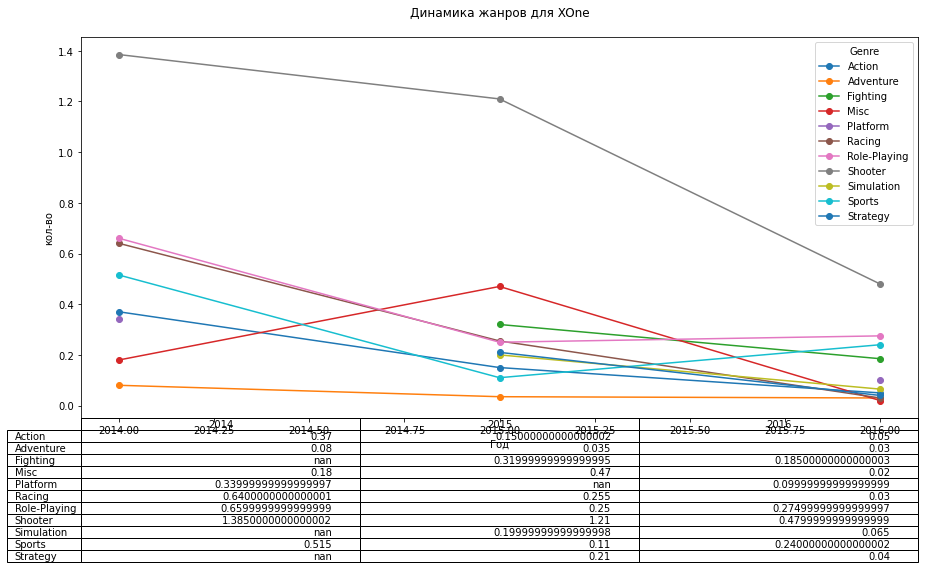

In [39]:
top_list = list((final_data
                 .groupby('Platform')
                .agg({'Total_sales':'count'}).sort_values('Total_sales', ascending=False).head(3)).index)

tail_list = list((final_data
                .groupby('Platform')
                .agg({'Total_sales':'count'}).sort_values('Total_sales', ascending=False).tail(3)).index)

for palforma in top_list:    
    (final_data[final_data['Platform']==palforma]
         .pivot_table(index='Genre', columns='Year_of_release', values='Total_sales', aggfunc='median')
         .T
         .plot(kind='line', figsize=(15, 7), style = 'o-', table=True))
    plt.title(f'Динамика жанров для {palforma}'+ "\n")
    plt.xlabel('Год')
    plt.ylabel('кол-во');

#### Медианные продажи

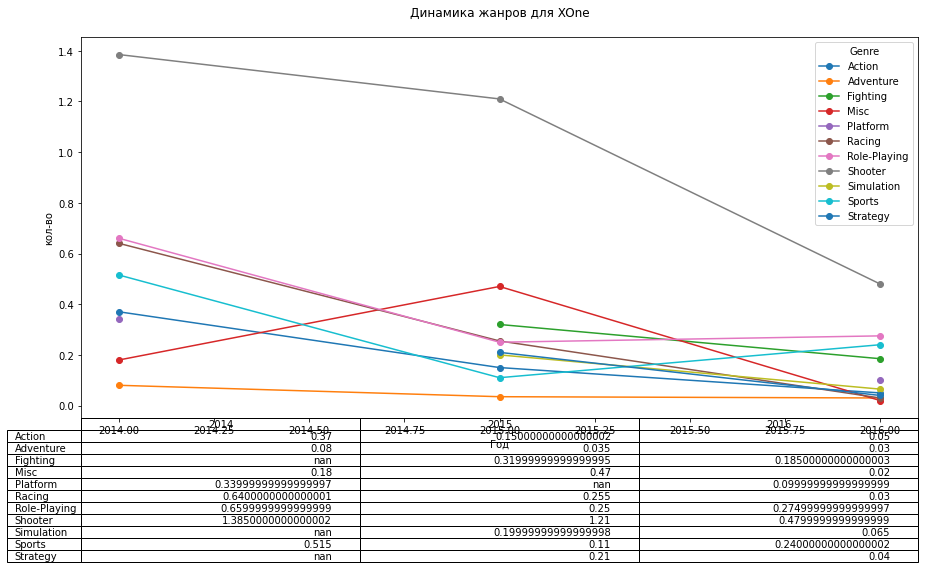

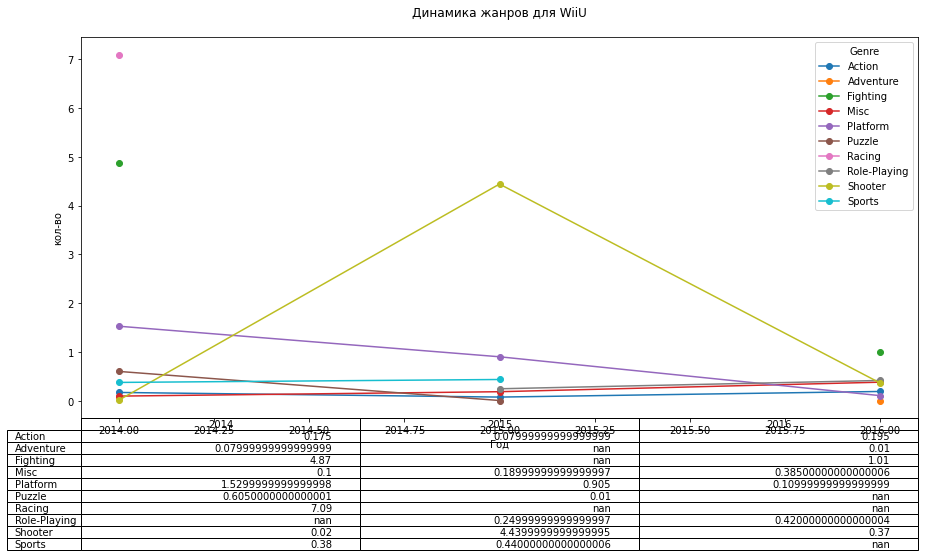

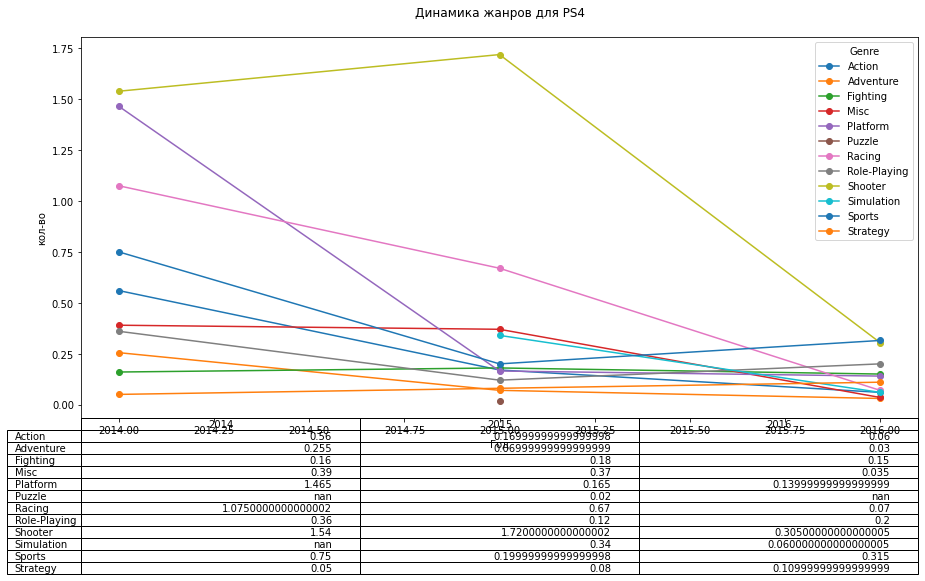

In [40]:
top_list = list((final_data
                 .groupby('Platform')
                .agg({'Total_sales':'median'}).sort_values('Total_sales', ascending=False).head(3)).index)

tail_list = list((final_data
                .groupby('Platform')
                .agg({'Total_sales':'median'}).sort_values('Total_sales', ascending=False).tail(3)).index)

for palforma in top_list:    
    (final_data[final_data['Platform']==palforma]
         .pivot_table(index='Genre', columns='Year_of_release', values='Total_sales', aggfunc='median')
         .T
         .plot(kind='line', figsize=(15, 7), style = 'o-', table=True))
    plt.title(f'Динамика жанров для {palforma}'+ "\n")
    plt.xlabel('Год')
    plt.ylabel('кол-во');

### Влияние рейтинга на жанр 

<AxesSubplot:xlabel='Rating'>

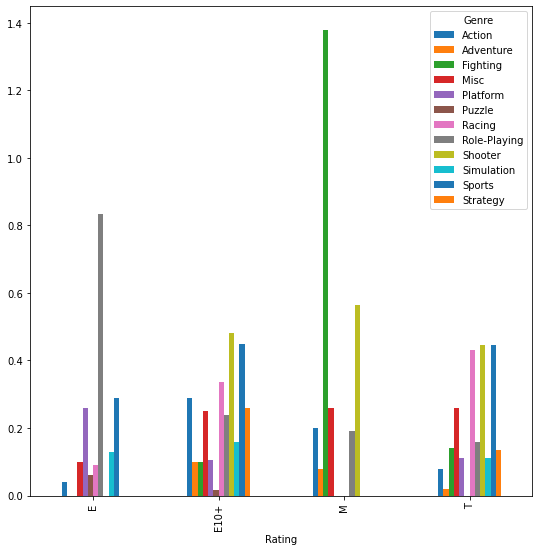

In [41]:
(final_data[final_data['Rating']!='WOR']
         .pivot_table(index='Genre', columns='Rating', 
                      values='Total_sales', aggfunc='median')
         .T.plot(kind='bar', figsize=(9,9)))

### Выводы

Так же как и в разрезе платформ, в разрезе жанров наблюдается высокое влияние "звездных" игр.

ТОП 3 жанра абсолютных продаж Action, Shooter, Sports
ТОП 3 жанра меданных продаж Shooter, Sports, Platform  

<b>Рекомендуется делать акцент для жанров Shooter, Sports, которые имеют хорошие медианные продажи и большую долю "звезд".

<b>Так же можно выбрать платформы Platform, Simulation  которые обладают выше среднего показателем медианных продаж и небольшим количеством "звезд".

## Зависимость продаж от отзывов на популярной платформе

### Абсолютные продажи

In [42]:
top_list = list((final_data
                 .groupby('Platform')
                .agg({'Total_sales':'sum'}).sort_values('Total_sales', ascending=False).head(3)).index)

-0.030764547505905765

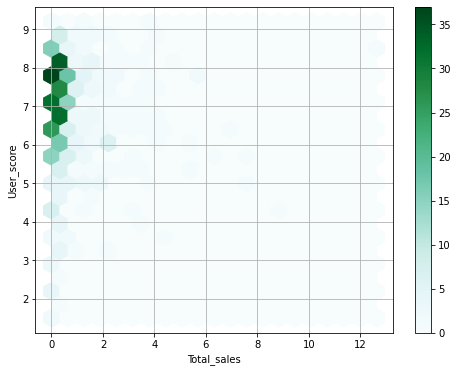

In [43]:
(final_data.query('Platform in @top_list')
           .plot(x='Total_sales', y='User_score', 
                   kind='hexbin', gridsize=20, figsize=(8, 6), 
                   sharex=False, grid=True)
)
final_data.query('Platform in @top_list')['Total_sales'].corr(final_data['User_score'])

0.328105086966363

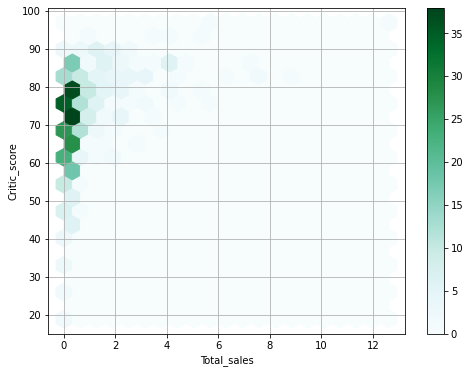

In [44]:
(final_data.query('Platform in @top_list')
           .plot(x='Total_sales', y='Critic_score', 
                kind='hexbin', gridsize=20, 
                figsize=(8, 6), sharex=False, grid=True))
final_data['Total_sales'].corr(final_data['Critic_score'])

### Медианные продажи

In [45]:
top_list = list((final_data
                 .groupby('Platform')
                .agg({'Total_sales':'median'}).sort_values('Total_sales', ascending=False).head(3)).index)

tail_list = list((final_data
                .groupby('Platform')
                .agg({'Total_sales':'median'}).sort_values('Total_sales', ascending=False).tail(3)).index)

-0.0016391611427287952

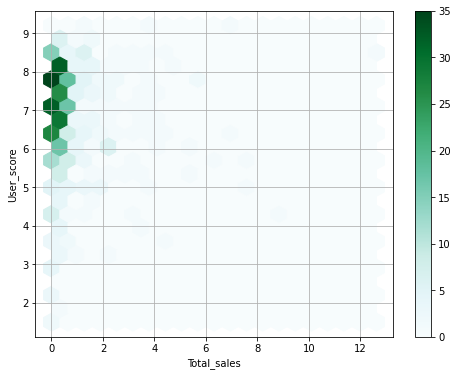

In [46]:
(final_data.query('Platform in @top_list')
           .plot(x='Total_sales', y='User_score', 
                   kind='hexbin', gridsize=20, figsize=(8, 6), 
                   sharex=False, grid=True)
)
final_data.query('Platform in @top_list')['Total_sales'].corr(final_data['User_score'])

0.328105086966363

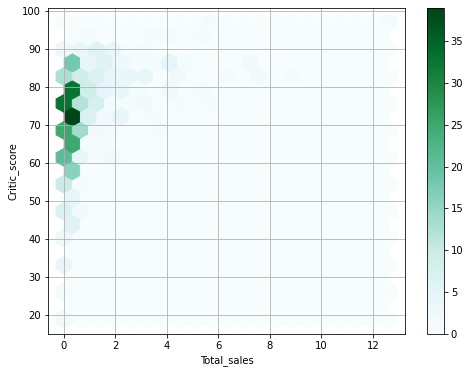

In [47]:
(final_data.query('Platform in @top_list')
           .plot(x='Total_sales', y='Critic_score', 
                kind='hexbin', gridsize=20, 
                figsize=(8, 6), sharex=False, grid=True))

final_data['Total_sales'].corr(final_data['Critic_score'])

### Выводы


Пользовательские оценки практически не имеют влияние на продажи игры, либо эта связь более сложная. Оценки критиков в свою очередь имеют слабое влияние на на количество проданных игр.

## Зависимость продаж от отзывов на менее популярных платформах

### Абсолютные продажи

In [48]:
tail_list = list((final_data
                .groupby('Platform')
                .agg({'Total_sales':'sum'}).sort_values('Total_sales', ascending=False).tail(3)).index)

-0.0016391611427287952

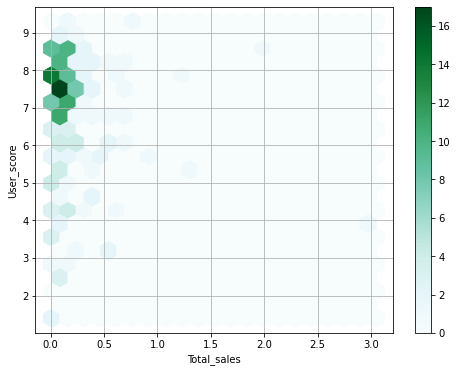

In [49]:
(final_data.query('Platform in @tail_list')
           .plot(x='Total_sales', y='User_score', 
                   kind='hexbin', gridsize=20, figsize=(8, 6), 
                   sharex=False, grid=True)
)
final_data.query('Platform in @top_list')['Total_sales'].corr(final_data['User_score'])

0.328105086966363

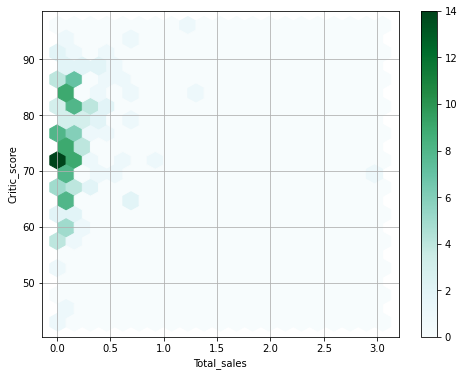

In [50]:
(final_data.query('Platform in @tail_list')
           .plot(x='Total_sales', y='Critic_score', 
                kind='hexbin', gridsize=20, 
                figsize=(8, 6), sharex=False, grid=True))
final_data['Total_sales'].corr(final_data['Critic_score'])

### Медианные продажи

In [51]:
tail_list = list((final_data
                .groupby('Platform')
                .agg({'Total_sales':'median'}).sort_values('Total_sales', ascending=False).tail(3)).index)

-0.0016391611427287952

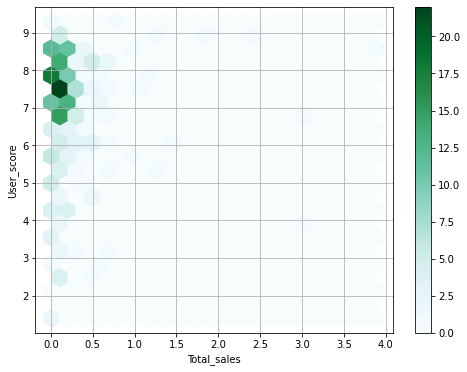

In [52]:
(final_data.query('Platform in @tail_list')
           .plot(x='Total_sales', y='User_score', 
                   kind='hexbin', gridsize=20, figsize=(8, 6), 
                   sharex=False, grid=True)
)
final_data.query('Platform in @top_list')['Total_sales'].corr(final_data['User_score'])

0.328105086966363

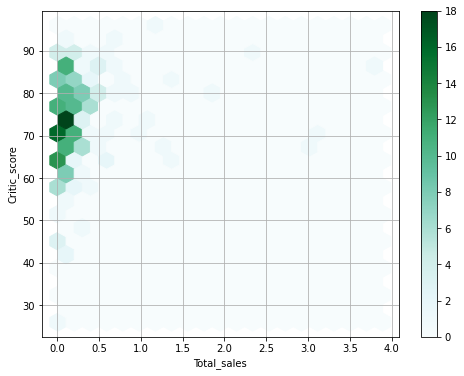

In [53]:
(final_data.query('Platform in @tail_list')
           .plot(x='Total_sales', y='Critic_score', 
                kind='hexbin', gridsize=20, 
                figsize=(8, 6), sharex=False, grid=True))
final_data['Total_sales'].corr(final_data['Critic_score'])

### Выводы


Пользовательские оценки практически не имеют влияние на продажи игры, либо эта связь более сложная. Оценки критиков в свою очередь имеют слабое влияние на на количество проданных игр.

# Портрет пользователя

## Самые популярные платформы

In [54]:
def display_top(data, groupby, column):
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(121)
    ax1.set_title('Абсолютные продажи')
    ax1.set_ylabel('млн копии')
    (data.groupby(groupby)
               .agg({'NA_sales':'sum','EU_sales':'sum','JP_sales':'sum','Other_sales':'sum'})
               .sort_values(column, ascending=False)[column].head(5)
               .plot(kind='bar',color='#9C02A7', ax=ax1, stacked=True))
    
    ax2 = fig.add_subplot(122)
    ax2.set_title('Медианные продажи')
    ax2.set_ylabel('млн копии')
    
    (data.groupby(groupby)
               .agg({'NA_sales':'median','EU_sales':'median','JP_sales':'median','Other_sales':'median'})
               .sort_values(column, ascending=False)[column].head(5)
               .plot(kind='bar',color='#FFB273', ax=ax2))
    plt.show()

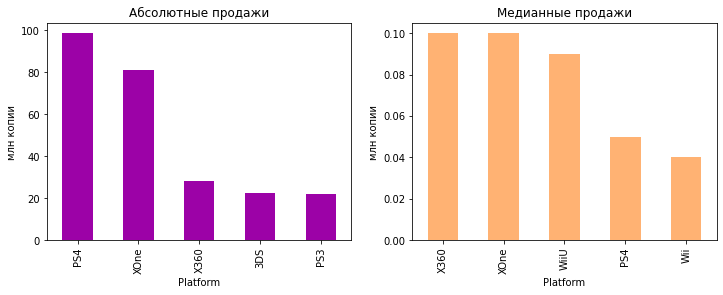

In [55]:
display_top(final_data,'Platform', 'NA_sales')

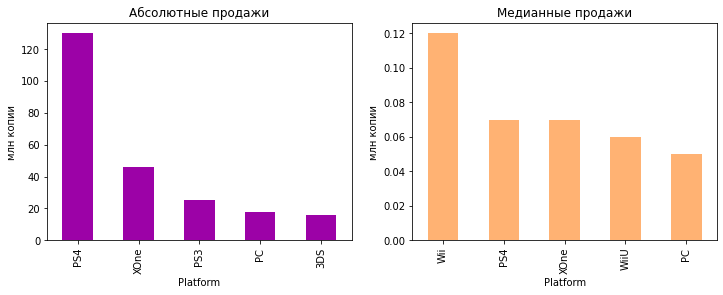

In [56]:
display_top(final_data,'Platform', 'EU_sales')

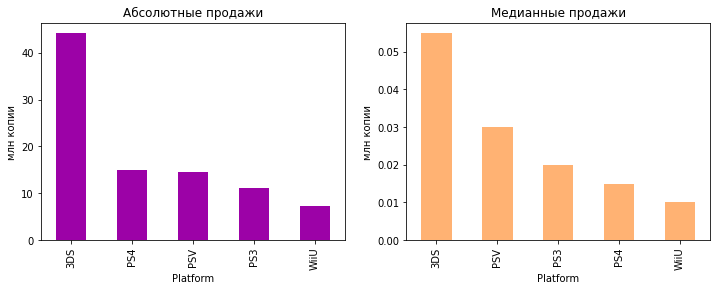

In [57]:
display_top(final_data,'Platform', 'JP_sales')

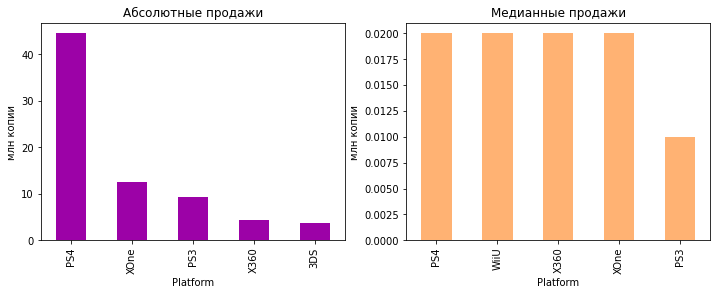

In [58]:
display_top(final_data,'Platform', 'Other_sales')

### Выводы

Во всех регионах свои топ абсолютных и медианных продаж, но можно выделить платформы лидеры по абсолютным и медианным продажам

NA - XOne, PS4
EU - PS4, XOne
JP - 3DS, PS4
Other - PS4, XOne

## Самые популярные жанры

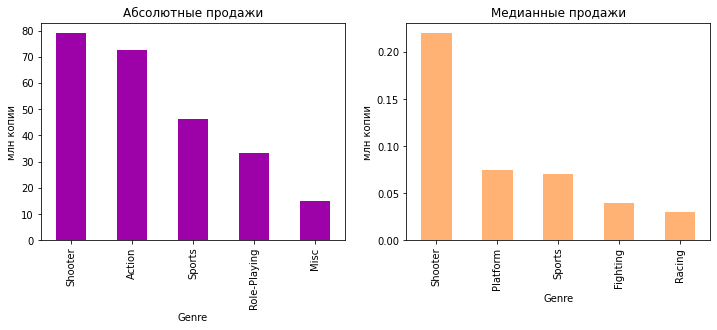

In [59]:
display_top(final_data,'Genre', 'NA_sales')

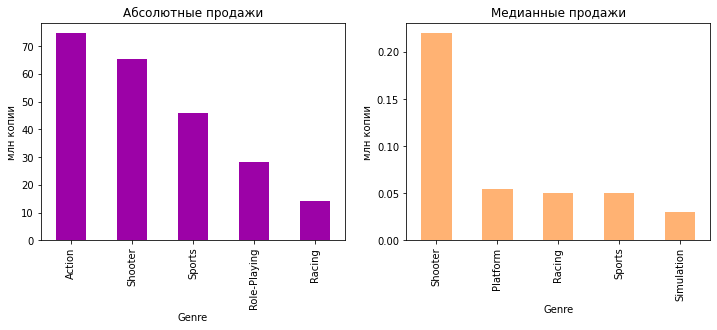

In [60]:
display_top(final_data,'Genre', 'EU_sales')

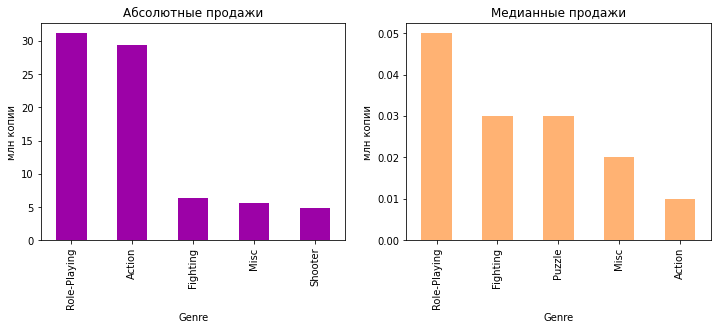

In [61]:
display_top(final_data,'Genre', 'JP_sales')

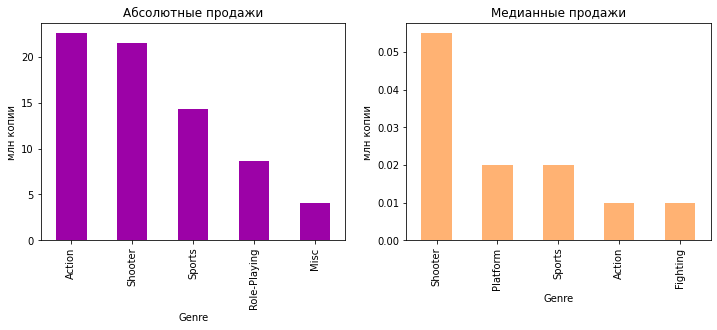

In [62]:
display_top(final_data,'Genre', 'Other_sales')

### Выводы

Почти во всех регионах лидером является Shooter, кроме Японии, где лидерами являются Role-Playing.

## Влияние рейтинга ESRB на продажи в регионах

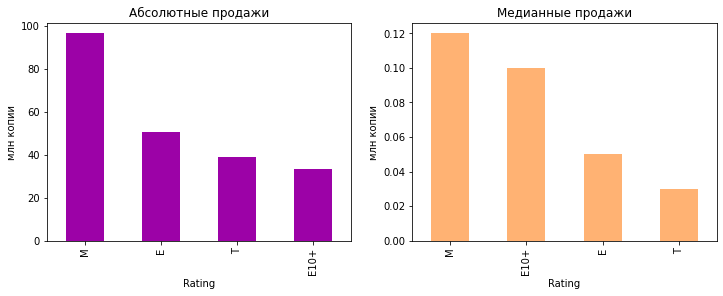

In [63]:
display_top(final_data[final_data['Rating']!='WOR'],'Rating', 'NA_sales')

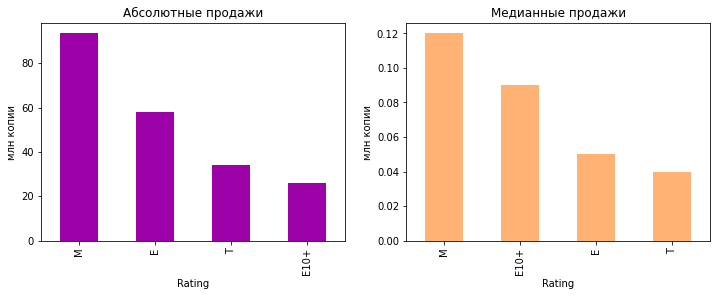

In [64]:
display_top(final_data[final_data['Rating']!='WOR'],'Rating', 'EU_sales')

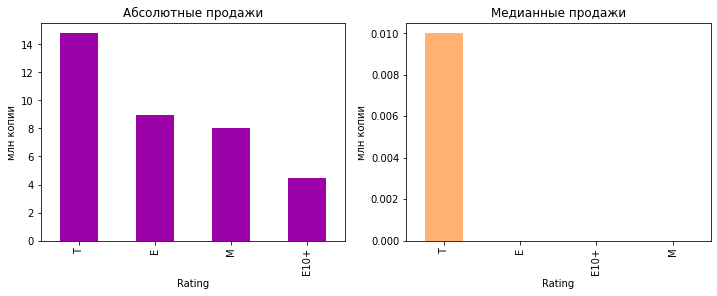

In [65]:
display_top(final_data[final_data['Rating']!='WOR'],'Rating', 'JP_sales')

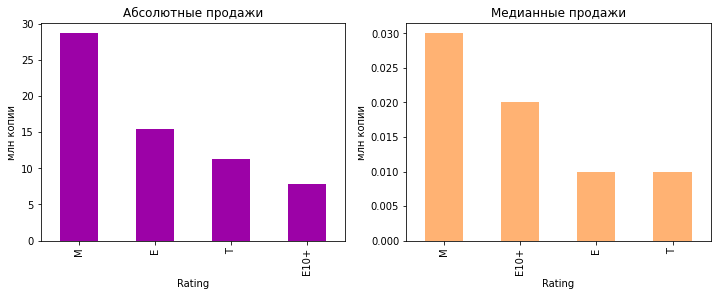

In [66]:
display_top(final_data[final_data['Rating']!='WOR'],'Rating', 'Other_sales')

### Выводы

В Южной америке и европе лучше всего продаются игра с рейтингом M
В Японии лучше всего продаются игры с рейтингом T
В остальных странах лучше всего продаются игра с рейтингом M

# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0: mean_XOne_user_score = mean_PC_user_score
- H1: mean_XOne_user_score <> mean_PC_user_score

In [67]:
results  = st.ttest_ind (final_data[((final_data['Platform']=='XOne')&
                                     (final_data['User_score'].isna()==False))]['User_score'],
                                   final_data[((final_data['Platform']=='PC')&
                                              (final_data['User_score'].isna()==False))]['User_score'])

alpha = .05
if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу. Вероятность случайного расхождения среднего {results.pvalue:2.2%}')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу. Вероятность случайного расхождения среднего {results.pvalue:2.2%}') 

Не получилось отвергнуть нулевую гипотезу. Вероятность случайного расхождения среднего 10.45%


## Средние пользовательские рейтинги жанров Action и Sports разные

- H0: mean_Action_user_score = mean_Sports_user_score
- H1: mean_Action_user_score <> mean_Sports_user_score

In [68]:
results  = st.ttest_ind(final_data[((final_data['Genre']=='Action')&
                                     (final_data['User_score'].isna()==False))]['User_score'],
                                   final_data[((final_data['Genre']=='Sports')&
                                     (final_data['User_score'].isna()==False))]['User_score'])

alpha = .05

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу. Вероятность случайного расхождения среднего {results.pvalue:2.2%}')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу. Вероятность случайного расхождения среднего {results.pvalue:2.2%}') 

Отвергаем нулевую гипотезу. Вероятность случайного расхождения среднего 0.00%


# Выводы

Были удалены 271 строка без имени, года выпуска или жанра.

Для пропущенных значений оценок и оценок со значением 'tbd' были оставлены NaN значения, что бы данные строки пропускались при анализе.
Для пропущенных значений рейтинга были установлены значения 'WOT' для того что бы их исключить из рейтинга.

Для итогового набора данных были взяты только те платформы для которых в 2016 были релизы, так же анализ графиков продаж по годам, показал, что есть явные тренды в последние 3 года. Поэтому для формирования итогового набора возьмем данные с T-3 (2013) года.

Пик выпуска игр пришелся на 2015 год, с 2014 до 2015 идет восходящий тренд, в 2016 наблюдается падение выпуска игр.

В анализируемом периоде ТОП3 по абсолютным продажам платформ - PS4, PSV, PS3. Не популярные платформы по абсолютным продажам X360, WiiU, Wii. 

В анализируемом периоде ТОП3 по медианным продажам платформ - XOne, WiiU, PS4. Не популярные платформы по медианным продажам 3DS, PC, PSV. 

Из анализа видно, что для большей части платформ большую роль играют "звездные" игры, которые делают большие продажи, хотя в среднем продажи не высоки. 

<b>Рекомендуется делать акцент для платформ XOne, PS4, которые имеют хорошие медианные продажи и большую долю "звезд".</b>

<b>Так же можно выбрать платформы WiiU, Wii, которые обладают средним показателем медианных продаж и небольшим количеством "звезд".</b>

Так же как и в разрезе платформ, в разрезе жанров наблюдается высокое влияние "звездных" игр.

ТОП 3 жанра абсолютных продаж Action, Shooter, Sports

ТОП 3 жанра меданных продаж Shooter, Sports, Platform  

<b>Рекомендуется делать акцент для жанров Shooter, Sports, которые имеют хорошие медианные продажи и большую долю "звезд".</b>

<b>Так же можно выбрать платформы Platform, Simulation  которые обладают выше среднего показателем медианных продаж и небольшим количеством "звезд".</b>
    
Во всех регионах свои топ абсолютных и медианных продаж, но можно выделить платформы лидеры по абсолютным и медианным продажам

- NA - XOne, PS4
- EU - PS4, XOne
- JP - 3DS, PS4
- Other - PS4, XOne
    
<b>Рекомендуется делать акцент для платформ XOne (кроме Японии), PS4, 3DS (только для Японии)</b>
   
Почти во всех регионах лидером абсолютных продаж с хорошим показателем медианных продаж является Shooter, кроме Японии, где аналогичным лидером являются Role-Playing.

- В NA и EU лучше всего продаются игры с рейтингом M
- В JP лучше всего продаются игры с рейтингом T
- В остальных странах лучше всего продаются игра с рейтингом M
 
Так же в рамках исследования не удалось отбросить гипотезу, о том что средний пользовательский рейтинг у PC и XOne различаются. Так же не удалось отбросить гипотезу о том что у жанров Action и Sports разные средние пользовательские рейтинги.  
